# project 6
## Traffic Accident prediction
### Machine Learning
### Supervised Learning(classification)
### models; Decisiontreeclassifier, logistic regression, Random Forest Classifier, Graidint bossting and voting classifier
data Content :
* The data set has been prepared from manual records of road traffic accident of the year 2017-20. All the sensitive information have been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms algorithms. RTA Dataset.csv is the dataset before preprocessing and cleaned.csv is the preprocessed dataset.


* Goal: atleast 85% accuracy

In [1]:
# IMPORT libraries
import pandas as pd 
import numpy as np


In [2]:
# load data 
data = pd.read_csv("cleaned.csv")
data.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


##### lets understand the data

In [3]:
# checking data types
data.dtypes

Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Lanes_or_Medians           object
Types_of_Junction          object
Road_surface_type          object
Light_conditions           object
Weather_conditions         object
Type_of_collision          object
Vehicle_movement           object
Pedestrian_movement        object
Cause_of_accident          object
Accident_severity           int64
dtype: object

In [4]:
# checking missing values
data.isna().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [5]:
# checking misssing value 
data.shape

(12316, 15)

#### Data is partialy clean no missing values only object values so lets encode those values first split be features and label


In [7]:
# features
x = data.drop("Accident_severity", axis  = 1)

#labels
y = data["Accident_severity"]

#### lets encode the Data

In [9]:
# Checking the number of unique values for each categorical feature
categorical_cols = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].nunique() for col in categorical_cols}

unique_values

{'Age_band_of_driver': 5,
 'Sex_of_driver': 3,
 'Educational_level': 7,
 'Vehicle_driver_relation': 4,
 'Driving_experience': 8,
 'Lanes_or_Medians': 7,
 'Types_of_Junction': 8,
 'Road_surface_type': 6,
 'Light_conditions': 4,
 'Weather_conditions': 9,
 'Type_of_collision': 10,
 'Vehicle_movement': 13,
 'Pedestrian_movement': 9,
 'Cause_of_accident': 20}

In [11]:
# import onehot encoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#insstantiate labelencoder
encoder = LabelEncoder()

#getting all low cardinalit columns
low_card = ['Sex_of_driver', 'Light_conditions', 'Age_band_of_driver', 'Vehicle_driver_relation']


# encode
for coll in low_card:
    x[coll] = encoder.fit_transform(x[coll])

# Encode high cardinality features using One-Hot Encoding
high_cardinality_features = list(set(categorical_cols) - set(low_card))
#encode
x = pd.get_dummies(x, columns=high_cardinality_features, drop_first=True)

In [12]:
x.dtypes

Age_band_of_driver           int64
Sex_of_driver                int64
Vehicle_driver_relation      int64
Light_conditions             int64
Driving_experience_2-5yr      bool
                             ...  
Types_of_Junction_Other       bool
Types_of_Junction_T Shape     bool
Types_of_Junction_Unknown     bool
Types_of_Junction_X Shape     bool
Types_of_Junction_Y Shape     bool
Length: 91, dtype: object

In [13]:
x.head()

,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Light_conditions,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_Unknown,...,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Types_of_Junction_No junction,Types_of_Junction_O Shape,Types_of_Junction_Other,Types_of_Junction_T Shape,Types_of_Junction_Unknown,Types_of_Junction_X Shape,Types_of_Junction_Y Shape
0,0,1,0,3,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1,1,0,3,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2,0,1,0,3,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,0,1,0,0,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,0,1,0,0,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [14]:
x.shape

(12316, 91)

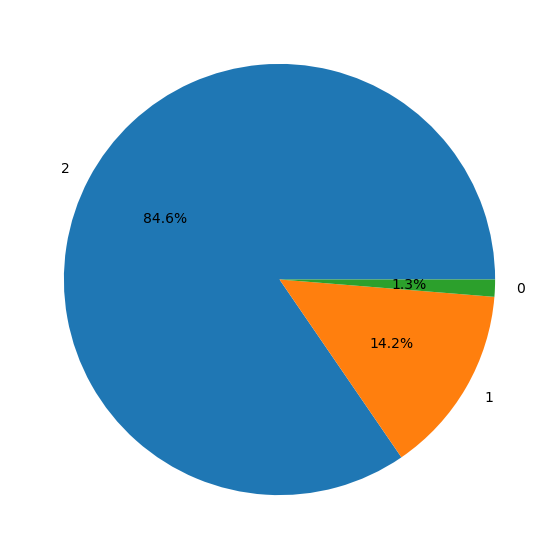

In [79]:
# plot accident sevierity 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.pie(x=data['Accident_severity'].value_counts().values,
        labels=data['Accident_severity'].value_counts().index,
        autopct='%2.1f%%')
plt.show()


#### class inbalance😑😔

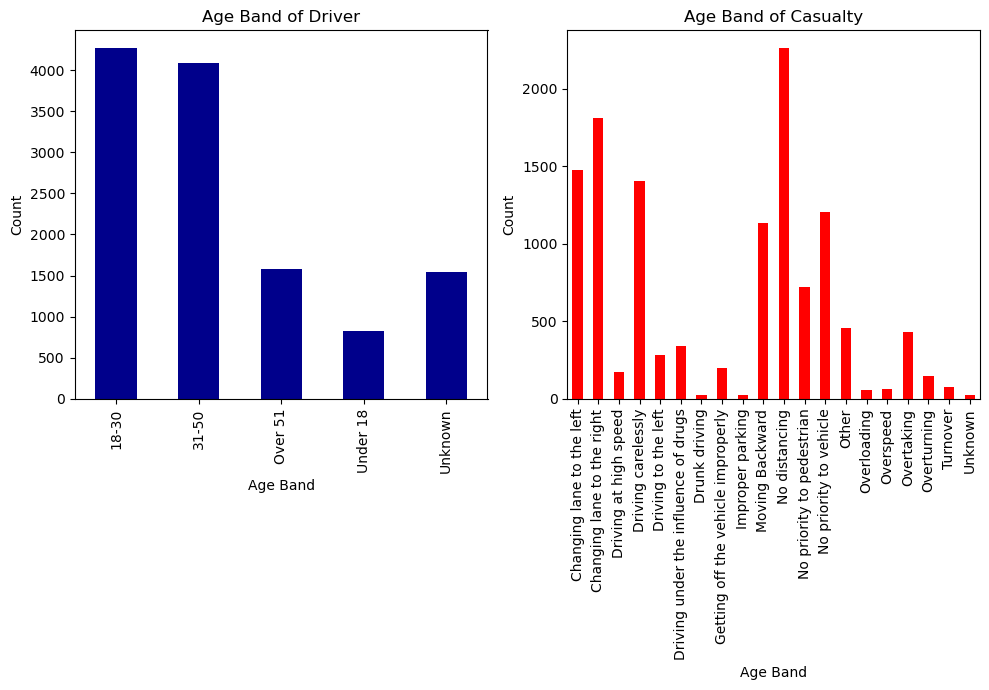

In [88]:
# plot Age_band_of_driver 
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
data['Age_band_of_driver'].value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('Age Band of Driver')
plt.xlabel('Age Band')
plt.ylabel('Count')

# plot Age_band_of_casualty
plt.subplot(1, 2, 2)
data["Cause_of_accident"].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Age Band of Casualty')
plt.xlabel('Age Band')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

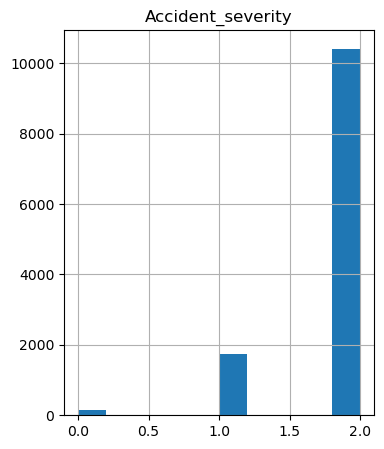

In [80]:
data.hist(layout=(1,6), figsize=(30,5))
plt.show()

#### we have succesfully encoded our data now lets split to train and test set

In [15]:
from sklearn.model_selection import train_test_split

# setting randoms seed
np.random.seed(42) 

# split the data 
x_train, x_test, y_train, y_tesst = train_test_split(x,y, test_size = 0.2, random_state=42)

# Modeling
#### lets start model creation

In [21]:
# importin the models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42),
}


def fit_and_score_models(models,X_train, y_train, X_test, y_test):
    """
    Fits and evaluates four classification models: Logistic Regression, Random Forest,
    XGBoost, and SVM on the given training and test data.

    Parameters:
    - X_train: Training feature set.
    - y_train: Training target labels.
    - X_test: Test feature set.
    - y_test: Test target labels.

    Returns:
    - A dictionary containing the accuracy and classification report for each model.
    """
    results = {}

    for name, model in models.items():
        print(f"Training {name}...")
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = print(classification_report(y_test, y_pred, output_dict=True))

        # Store results
        results[name] = {
            "accuracy": accuracy,
            "classification_report": report,
        }

    return results

In [22]:
fit_and_score_models(models,x_train, y_train, x_test, y_tesst)

Training Logistic Regression...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.p

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 37.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 363.0}, '2': {'precision': 0.8376623376623377, 'recall': 1.0, 'f1-score': 0.911660777385159, 'support': 2064.0}, 'accuracy': 0.8376623376623377, 'macro avg': {'precision': 0.2792207792207792, 'recall': 0.3333333333333333, 'f1-score': 0.303886925795053, 'support': 2464.0}, 'weighted avg': {'precision': 0.7016781919379322, 'recall': 0.8376623376623377, 'f1-score': 0.7636638979395164, 'support': 2464.0}}
Training Random Forest...
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 37.0}, '1': {'precision': 0.07142857142857142, 'recall': 0.005509641873278237, 'f1-score': 0.010230179028132993, 'support': 363.0}, '2': {'precision': 0.8365503080082135, 'recall': 0.9869186046511628, 'f1-score': 0.9055345632362747, 'support': 2064.0}, 'accuracy': 0.8275162337662337, 'macro avg': {'precision': 0.3026596264789283, 'recall': 0.330809415508146

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Logistic Regression': {'accuracy': 0.8376623376623377,
  'classification_report': None},
 'Random Forest': {'accuracy': 0.8275162337662337,
  'classification_report': None},
 'XGBoost': {'accuracy': 0.8311688311688312, 'classification_report': None},
 'SVM': {'accuracy': 0.8376623376623377, 'classification_report': None}}

#### all models are performing well so i will select just 2 from them
* logistic regression
* randomforest classifier

In [31]:
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier

#set up random seed
np.random.seed(42)

# initialize model 
lr_model = LogisticRegression(multi_class="multinomial", max_iter=2000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# fit with data 
lr_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomForestClassifier(n_estimators=500, random_state=42)

In [32]:
y.value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

Class 0: 158
Class 1: 1743
Proportion: 0.09 : 1


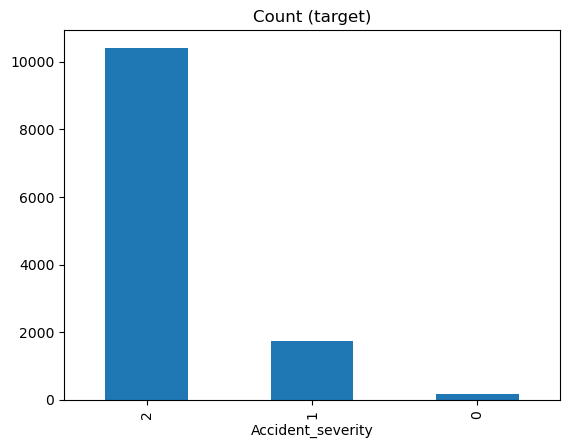

In [77]:
target_count = data['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

### class  in balance it may affect model 

In [33]:
lr_pred = lr_model.predict(x_test)
rf_pred = rf_model.predict(x_test)

print(classification_report(y_tesst, lr_pred)),
print(accuracy_score(y_tesst, lr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464

0.8376623376623377


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
print(classification_report(y_tesst, rf_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      0.99      0.91      2064

    accuracy                           0.83      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.83      0.76      2464



### SINCE WE have tried one hot encoding so lets try label encoding

In [35]:
data.dtypes

Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Lanes_or_Medians           object
Types_of_Junction          object
Road_surface_type          object
Light_conditions           object
Weather_conditions         object
Type_of_collision          object
Vehicle_movement           object
Pedestrian_movement        object
Cause_of_accident          object
Accident_severity           int64
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder

# initialize features and labels
x1 = data.drop("Accident_severity", axis=1)
y1 = data["Accident_severity"]

encoder = LabelEncoder()

for coll in x1:
    x1[coll]  = encoder.fit_transform(x1[coll])

In [39]:
x1.shape

(12316, 14)

In [40]:
x1.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,0,1,0,0,0,5,1,0,3,2,3,2,5,9
1,1,1,4,0,3,4,1,0,3,2,8,2,5,16
2,0,1,4,0,0,6,1,0,3,2,2,2,5,0
3,0,1,4,0,2,6,7,2,0,2,8,2,5,1
4,0,1,4,0,1,6,7,0,0,2,8,2,5,16


In [41]:
x1.dtypes

Age_band_of_driver         int32
Sex_of_driver              int32
Educational_level          int32
Vehicle_driver_relation    int32
Driving_experience         int32
Lanes_or_Medians           int32
Types_of_Junction          int32
Road_surface_type          int32
Light_conditions           int32
Weather_conditions         int32
Type_of_collision          int32
Vehicle_movement           int32
Pedestrian_movement        int32
Cause_of_accident          int32
dtype: object

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#set up random seed
np.random.seed(42)

# splitting to train and test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)

# initializing the model 
lr_model1 = LogisticRegression()
rf_model1 = RandomForestClassifier(n_estimators=200, random_state=42)

# fit with data 
lr_model1.fit(x_train1, y_train1)
rf_model1.fit(x_train1, y_train1)




c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=200, random_state=42)

In [51]:
# make predictions
lr_pred1 = lr_model1.predict(x_test1)
rf_pred1 = rf_model1.predict(x_test1)

print(classification_report(y_test1, lr_pred1))
print(accuracy_score(y_test1,lr_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464

0.8376623376623377


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
print(classification_report(y_test1, rf_pred1))
print(accuracy_score(y_test1, rf_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      0.99      0.90      2064

    accuracy                           0.83      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.83      0.76      2464

0.825487012987013


### well THe model still performs similarly so lets perform hyper parameter tunniig and seee

Logistic Regression

In [54]:
from sklearn.model_selection import GridSearchCV



param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga', 'liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500],
    'l1_ratio': [0.1, 0.5, 0.9]
}

lrcv = GridSearchCV(lr_model1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=1,
                    n_jobs=-1,
                    scoring="accuracy")

lrcv.fit(x_train1,y_train1)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga', 'liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [55]:
lr_b_model = lrcv.best_estimator_
print(lrcv.best_params_)


{'C': 0.01, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


RandomForestClassifier

In [57]:
from sklearn.model_selection import GridSearchCV


rfparam_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False]
}
rfcv  = GridSearchCV(rf_model1, param_grid=rfparam_grid,n_jobs=-1,cv=5, verbose=1, scoring="accuracy")

rfcv.fit(x_train1, y_train1)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [58]:
rf_b_model = rfcv.best_estimator_
print(rfcv.best_params_)

{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [59]:
#make predictions
glr_pred = lr_b_model.predict(x_test1)
grf_pred  = rf_b_model.predict(x_test1)

In [60]:
accuracy_score(y_test1, glr_pred), accuracy_score(y_test1,grf_pred)


(0.8376623376623377, 0.8368506493506493)

In [61]:
print(classification_report(y_test1, glr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
print(classification_report(y_test1, grf_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.25      0.00      0.01       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.36      0.33      0.31      2464
weighted avg       0.74      0.84      0.76      2464



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### so the random forest model is better because i generalises more on the data  but lets use something called volting classifier

### Putting it all in one cell block

In [72]:
# import libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn. metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# import data 
df = pd.read_csv("cleaned.csv")

# initialising encoder
encoder = LabelEncoder()

# assing fatures and labels
x = df.drop("Accident_severity", axis=1)
y = df["Accident_severity"]

for coll in x:
    x[coll]  = encoder.fit_transform(x[coll])

#splitting to  train and test set
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# define base models 
base_models = [
    ("LogisticRegression", LogisticRegression(C=0.1, l1_ratio=0.1, max_iter=100, penalty='l1',solver='saga', random_state=42)),
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=50, bootstrap=False, max_depth=30, max_features='sqrt', min_samples_leaf=2, min_samples_split=10 , random_state=42)),
    ("DecisionTree", DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
]

# initalize voting model 
voting_model = VotingClassifier(estimators=base_models, voting='hard')



# fit pipeline with normal data 
voting_model.fit(x_train, y_train)

# generate y_psudo_labels for test data 
y_psudo_labels = voting_model.predict(x_test)

# combine original data with psudo data
x_augmented  = np.vstack([x_train, x_test])
y_augmented = np.hstack([y_train, y_psudo_labels])

#retrain data on augmented data
voting_model.fit(x_augmented, y_augmented)

# make prediction
y_pred = voting_model.predict(x_test)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature name

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accurcy: {accuracy*100:.2f}%")

accurcy: 83.69%


final accuracy is 83.69%

<Axes: >

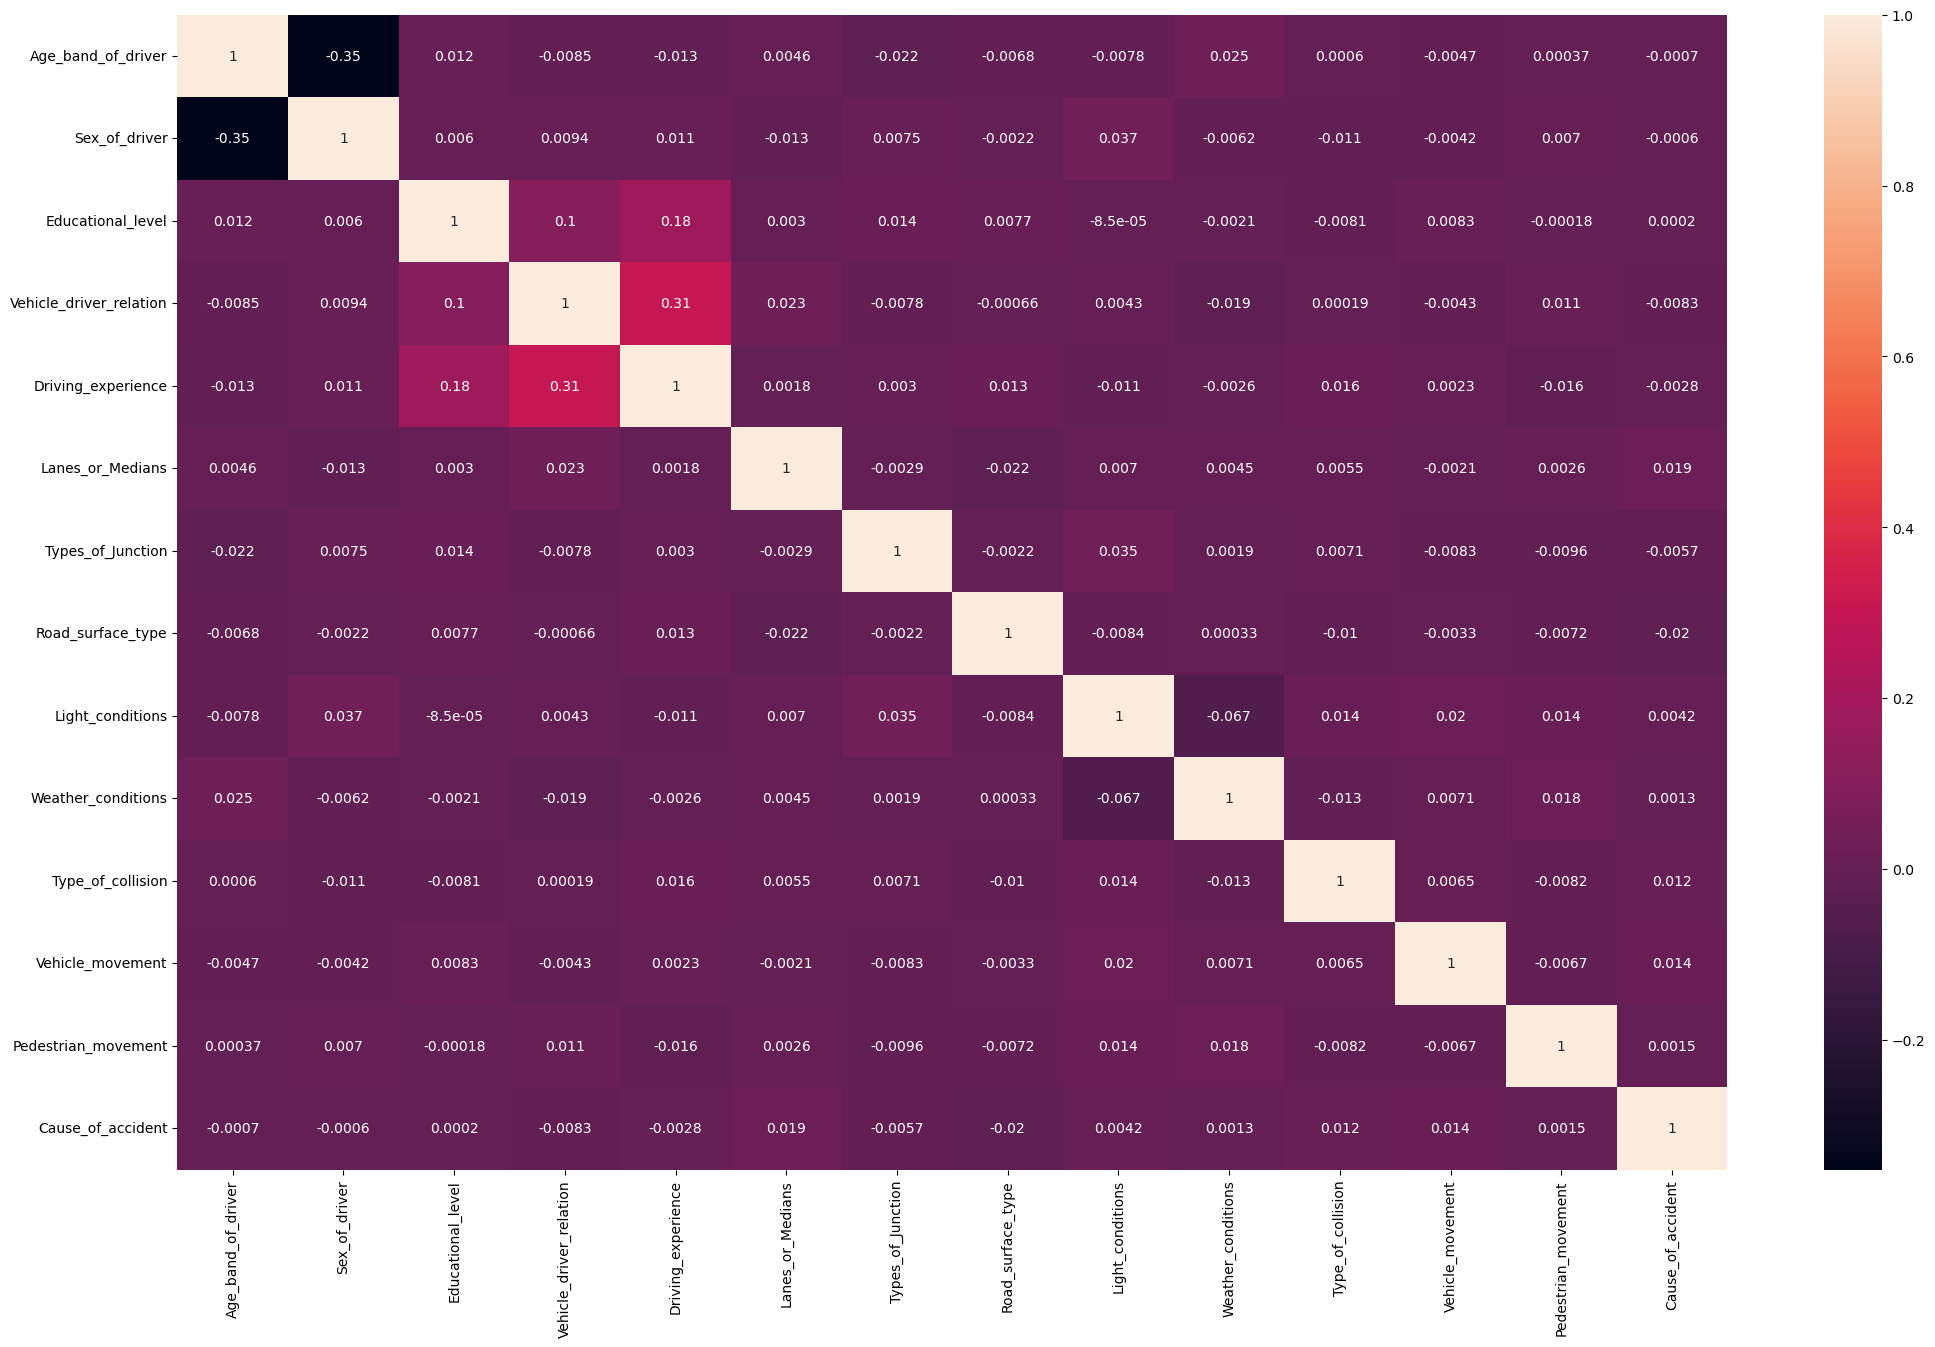

In [76]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=[25,15])
sns.heatmap(x.corr(),annot=True)

final accuracy = 83% lets save our model

In [89]:
import joblib

joblib.dump(voting_model, "TA_model.pkl")

['TA_model.pkl']

## Unfoutunatly i was unable to meet my goal of 85% due to class inbalance instead i got 83.6%

end of project good byee😊😊😊